In [1]:
import logging
import os

import matplotlib.pyplot as plt
import mujoco
import mujoco.viewer as viewer
import numpy as np
import numpy.typing as npt
from dm_control import mjcf
from pipe import select
from scipy.spatial.transform import Rotation as R
from sim._mujoco.models import (
    attach_to_model,
    gen_end_effector,
    gen_goal_square,
    get_mujoco_model,
)
from sim._mujoco.procedural_model import add_model
from sim.inverse_kinematics import get_IK
from sim.inverse_kinematics.decoupled_position_and_orientation import (
    create_inverse_kinematics_function,
)

In [2]:
a1 = 0.42  # Length of first link
a2 = 0.4  # Length of second link
d6 = 0.181  # Distance from wrist to end-effector
ikf = create_inverse_kinematics_function(a1, a2, d6)

pi = np.pi

In [3]:
home = os.path.expanduser("~")
path = f"{home}/Code/OtherProjects/mujoco_menagerie/kuka_iiwa_14/scene2.xml"
assert os.path.exists(path), path + " does not exist"
xml_model = mjcf.from_path(path)
site = xml_model.find("site", "attachment_site").parent
common_options = {
    "asset_scale": [0.1, 0.1, 0.1],
    "compiler_angle": "radian",
    "path_name": "./assets/end_effectors",
}
obj = "cyl_8"
add_model(f"e_{obj}", xml_model, site, geom_density=0.1, **common_options)
add_model(f"h_{obj}", xml_model, geom_pos=[0.4, 0, 0], **common_options)

mjcf.export_with_assets(xml_model, "tmp", "tmp.xml")
model = mujoco.MjModel.from_xml_path("tmp/tmp.xml")

DEBUG:ProceduralModelLogger:{'geom_density': 0.1, 'asset_scale': [0.1, 0.1, 0.1], 'compiler_angle': 'radian', 'path_name': './assets/end_effectors'}
DEBUG:ProceduralModelLogger:/mnt/c/Users/flipp/Documents/School/Thesis/catkin_ws/src/thesis_pkg/src/notebooks/e_cyl_8
DEBUG:ProceduralModelLogger:/home/philip
INFO:ProceduralModelLogger:add singlular model
INFO:ProceduralModelLogger:add a repetative model
DEBUG:ProceduralModelLogger:kwargs: {'type': 'mesh', 'mesh': 'e_cyl_8', 'density': 0.1, 'compiler_angle': 'radian'}
INFO:ProceduralModelLogger:using radians
DEBUG:ProceduralModelLogger:{'geom_pos': [0.4, 0, 0], 'asset_scale': [0.1, 0.1, 0.1], 'compiler_angle': 'radian', 'path_name': './assets/end_effectors'}
DEBUG:ProceduralModelLogger:/mnt/c/Users/flipp/Documents/School/Thesis/catkin_ws/src/thesis_pkg/src/notebooks/h_cyl_8
DEBUG:ProceduralModelLogger:/home/philip
INFO:ProceduralModelLogger:add singlular model
INFO:ProceduralModelLogger:add a repetative model
DEBUG:ProceduralModelLogger:k

In [4]:
viewer.launch(model)

In [5]:
ik = get_IK(m=model, joint="link7")

""

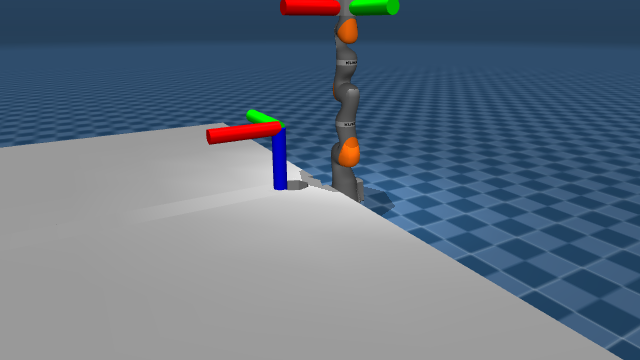

In [6]:
c = ik.c
c.show_image()

""

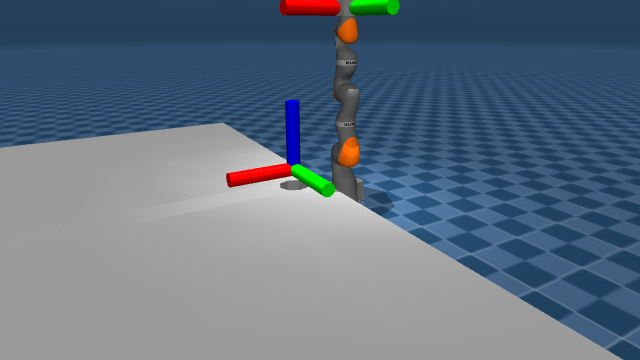

DEBUG:UtilLogger:inverse_kinematics(input):
DEBUG:UtilLogger:end_effector_position: [0.  0.  0.4]
DEBUG:UtilLogger:end_effector_rotation: [[ 1.0000000e+00  0.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00 -1.0000000e+00 -1.2246468e-16]
 [ 0.0000000e+00  1.2246468e-16 -1.0000000e+00]]
DEBUG:UtilLogger:a1: 0.42
DEBUG:UtilLogger:a2: 0.4
DEBUG:UtilLogger:d6: 0.181
DEBUG:UtilLogger:inverse_kinematics(output):
DEBUG:UtilLogger:[0.0, 0.8114271725245549, 1.5673409627761339, -1.772369099123772e-16, 0.7628245182891045, -3.141592653589793]
/home/philip/catkin_wsLink/src/thesis_pkg/src/sim/inverse_kinematics/InverseKinematics.py:386: RuntimeWarning: invalid value encountered in divide
  f"Direction of torque: {torques / np.linalg.norm(torques)}"
/home/philip/catkin_wsLink/src/thesis_pkg/src/sim/inverse_kinematics/InverseKinematics.py:381: RuntimeWarning: invalid value encountered in divide
  self.logger.debug(f"Direction of force: {forces / np.linalg.norm(forces)}")


In [7]:
error = []
forces_and_torques = []

ik.c.solve2([0.4, 0, 0.315], [pi, 0, 0]).copy_error_log(error).copy_torque_log(
    forces_and_torques
).show_video()

""

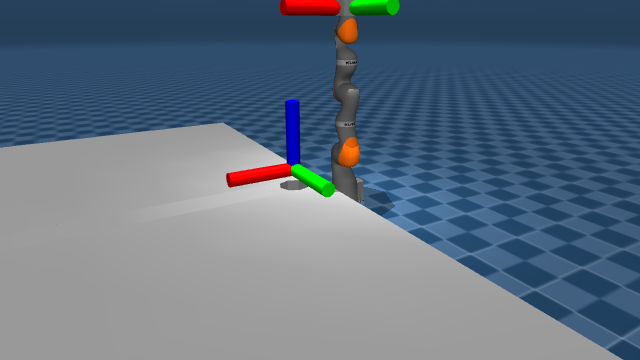

DEBUG:UtilLogger:inverse_kinematics(input):
DEBUG:UtilLogger:end_effector_position: [0.  0.  0.4]
DEBUG:UtilLogger:end_effector_rotation: [[ 1.0000000e+00  0.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00 -1.0000000e+00 -1.2246468e-16]
 [ 0.0000000e+00  1.2246468e-16 -1.0000000e+00]]
DEBUG:UtilLogger:a1: 0.42
DEBUG:UtilLogger:a2: 0.4
DEBUG:UtilLogger:d6: 0.181
DEBUG:UtilLogger:inverse_kinematics(output):
DEBUG:UtilLogger:[0.0, 0.8114271725245549, 1.5673409627761339, -1.772369099123772e-16, 0.7628245182891045, -3.141592653589793]


<_MjContactList
  H: array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

""

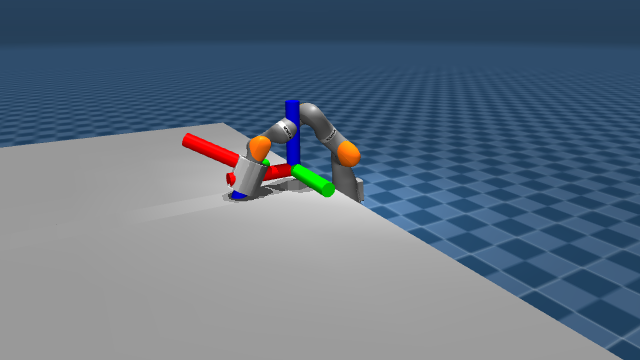

In [11]:
d = ik.c

error = []
forces_and_torques = []
try:
    d = d.solve3([0.4, 0, 0.315], [pi, 0, 0])
except Exception as e:
    d.show_image()

In [12]:
d.data.contact

<_MjContactList
  H: array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [25]:
sum(ik.model.body_geomnum)

81

In [30]:
pos_error = list(error[0] | select(lambda x: x[0]))
_ = plt.plot(pos_error)
plt.legend(["x", "y", "z"])

IndexError: list index out of range

In [ ]:
forces_and_torques_log = list(forces_and_torques[0] | select(lambda x: x[0]))
_ = plt.plot(forces_and_torques_log)
plt.legend(["x", "y", "z"])

In [ ]:
forces_and_torques_log = list(forces_and_torques[0] | select(lambda x: x[1]))
_ = plt.plot(forces_and_torques_log)
plt.legend(["x", "y", "z"])

In [19]:
xml_path = "/home/philip/Code/OtherProjects/mujoco_menagerie/kuka_iiwa_14/scene.xml"
model = mjcf.from_path(xml_path)
ee = gen_end_effector("capsule")
g = gen_goal_square(radius=0.045)

attach_to_model(model, ee)
model.worldbody.attach(g)

model = get_mujoco_model(model)
# viewer.launch(model)

In [ ]:
assert isinstance(model, mujoco.MjModel)

ik = get_IK(m=model, d=None, joint="link3").show_image()
ik.logger.setLevel(logging.CRITICAL)

In [21]:
ik_test = ik.c

In [ ]:
top_of_manipulator = [0.0, 0.0, 0.315 + 0.42 + 0.4 + 0.081 + 0.1]
# ik_test.data.mocap_pos[0] = top_of_manipulator
ik_test.show_image()

In [ ]:
goal: npt.NDArray[np.float64] = np.array([0.3, 0, 0.315])
error = []
forces_and_torques = []
ik_test.solve2([0.3, 0, 0.315], [pi, 0, 0], max_iterations=500).copy_error_log(
    error
).copy_torque_log(forces_and_torques).show_video()
# ik_test = (
#     ik.c.solve2([0.3, 0, 0.315], [pi, 0, 0])
#     .copy_error_log(error)
#     .solve2([0.3, 0, 0.315], [pi, 0, 0])
#     .copy_error_log(error)
#     .show_video()
# )

In [ ]:
pos_error = list(error[0] | select(lambda x: x[0]))
_ = plt.plot(pos_error)
plt.legend(["x", "y", "z"])

In [ ]:
forces_and_torques_log = list(forces_and_torques[0] | select(lambda x: x[0]))
_ = plt.plot(forces_and_torques_log)
plt.legend(["x", "y", "z"])

In [ ]:
forces_and_torques_log = list(forces_and_torques[0] | select(lambda x: x[1]))
_ = plt.plot(forces_and_torques_log)
plt.legend(["x", "y", "z"])

In [ ]:
ik_test.solve2([0.3, 0, 0.315], [0, pi, 0])

In [ ]:
ik_test.show_video()

In [ ]:
# Example parameters
# Desired end-effector position
end_effector_position = (goal - np.array([0, 0, 0.315]))[::-1]
# Desired end-effector orientation
end_effector_orientation = R.from_euler("xyz", [pi, 0, pi]).as_matrix()

# Solve inverse kinematics
joint_angles = ikf(end_effector_position, end_effector_orientation)

In [ ]:
ik2 = ik.c
ik2.data.mocap_pos[0] = goal  # p_e[::-1] + np.array([0.06, 0, 0.215])
ctrl = ik2.data.ctrl
# ik2.data.mocap_quat[0] = (R.from_euler("xyz", [0, 0, 0])).as_quat()

In [15]:
ctrl[0] = joint_angles[0]
ctrl[1] = joint_angles[1]
ctrl[2] = 0
ctrl[3] = -joint_angles[2]
ctrl[4] = joint_angles[3]
ctrl[5] = joint_angles[4]
ctrl[6] = joint_angles[5]

In [ ]:
with viewer.launch_passive(ik2.model, ik2.data) as v:
    while v.is_running():
        ik2.check_joint_limits()
        old = ik2.data.qpos.copy()
        mujoco.mj_step(ik2.model, ik2.data)
        while np.linalg.norm(ik2.data.qpos - old) > 1e-9:
            if not v.is_running():
                break
            old = ik2.data.qpos.copy()
            mujoco.mj_step(ik2.model, ik2.data)
            v.sync()
        v.sync()

ik2.check_joint_limits()
old = ik2.data.qpos.copy()
mujoco.mj_step(ik2.model, ik2.data)
while np.linalg.norm(ik2.data.qpos - old) > 1e-9:
    old = ik2.data.qpos.copy()
    mujoco.mj_step(ik2.model, ik2.data)
ik2.show_image()

In [ ]:
# joint 1 (base)         = 0.1575
# joint 2 (shoulder)     = 0.1575
# joint 3 (upper arm)    = 0.2045  # ]]]]]]]|--- 0.42
# joint 4 (upto elbow)   = 0.2155  # ]]]]]]]|
# joint 5 (from elbow)   = 0.1845  # |-- 0.4
# joint 6 (till wrist)   = 0.2155  # |
# joint 7 (wrist)        = 0.0810


for i in range(1, 8):
    print(i, ik.model.body(f"link{i}").pos)
ik.show_image()

In [ ]:
error_log = []
ik.c([0.5, 0, 0.4]).copy_error_log(error_log)([0.5, 0, 0.4], [0, 0, pi]).copy_error_log(
    error_log
)([0.5, 0, 0.2], [0, 0, pi]).copy_error_log(error_log).show_video()

In [ ]:
def show_pos_error(index: int):
    fig = plt.figure()
    ax = fig.gca()
    plt.plot([x[0] for x, _ in error_log[index]])
    plt.plot([x[1] for x, _ in error_log[index]])
    plt.plot([x[2] for x, _ in error_log[index]])
    plt.plot([np.linalg.norm(x) for x, _ in error_log[index]])
    plt.legend(
        [
            f"err traj {index+1}x",
            f"err traj {index+1}y",
            f"err traj {index+1}z",
            f"err traj {index+1}",
        ]
    )
    # ax.set_xticks(np.arange(0, 1, 0.1))
    # ax.set_yticks(np.arange(0, 1, 0.1))
    plt.grid()
    plt.show()


def show_rot_error(index: int):
    plt.plot([y[0] for _, y in error_log[index]])
    plt.plot([y[1] for _, y in error_log[index]])
    plt.plot([y[2] for _, y in error_log[index]])
    plt.plot([np.linalg.norm(y) for _, y in error_log[index]])
    plt.legend(
        [
            f"err traj {index+1}x",
            f"err traj {index+1}y",
            f"err traj {index+1}z",
            f"err traj {index+1}",
        ]
    )
    plt.show()


show_pos_error(0)
show_pos_error(1)
show_pos_error(2)
show_rot_error(0)
show_rot_error(1)
show_rot_error(2)

In [ ]:
ik.c([0, 0, 1], [pi, pi / 2, 0])([0, 0.5, 0.5]).show_video()

In [ ]:
ik2 = ik.__copy__()([0, 0.5, 0], [0, pi, 0]).show_video()
ik2.show_image()

In [ ]:
c_array = np.zeros(6, dtype=np.float64)
for i in range(ik2.data.ncon):
    mujoco.mj_contactForce(ik2.model, ik2.data, i, c_array)
    print("c_array", c_array)